<h2>Car Data - Exploratory Data Analysis</h2>

<h3>Import</h3>
Importing necessary Python packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Dataframe</h3>
Creating dataframe (df) from saved csv (wrangled).

In [2]:
path = "CarPriceData-wrangled.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,hrspwr-binned,fueltyp-diesel(0)/gas(1),aspiration-std(1)/turbo(0)
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.44,-0.85,...,2.68,9.0,111.0,5000.0,11.19,8.70,13495.0,Low,0,1
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.44,-0.85,...,2.68,9.0,111.0,5000.0,11.19,8.70,16500.0,Low,0,1
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,-0.24,-0.19,...,3.47,9.0,154.0,5000.0,12.37,9.04,16500.0,Medium,0,1
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.19,0.15,...,3.40,10.0,102.0,5500.0,9.79,7.83,13950.0,Low,0,1
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.19,0.24,...,3.40,8.0,115.0,5500.0,13.06,10.68,17450.0,Low,0,1


<h3>Analizing individual feature patterns using data viz</h3>

For this, understanding of variable types is important.

In [3]:
df.dtypes

symboling                       int64
normalized-losses             float64
make                           object
num-of-doors                   object
body-style                     object
drive-wheels                   object
engine-location                object
wheel-base                    float64
length                        float64
width                         float64
height                        float64
curb-weight                     int64
engine-type                    object
num-of-cylinders               object
engine-size                     int64
fuel-system                    object
bore                          float64
stroke                        float64
compression-ratio             float64
horsepower                    float64
peak-rpm                      float64
city-L/100km                  float64
highway-L/100km               float64
price                         float64
hrspwr-binned                  object
fueltyp-diesel(0)/gas(1)        int64
aspiration-s

Most numerical/quantative variables' simple correlation can be found as below.

In [4]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fueltyp-diesel(0)/gas(1),aspiration-std(1)/turbo(0)
symboling,1.000000,0.466264,-0.535987,-0.364594,-0.242062,-0.550377,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,0.066183,-0.029756,-0.082391,-0.196735,0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019527,0.086978,-0.373608,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,0.238710,0.181024,0.133999,-0.101546,0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.875684,0.814198,0.591057,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,0.476255,0.577655,0.584642,0.307237,-0.256889
length,-0.364594,0.019527,0.875684,1.000000,0.857071,0.491653,0.880720,0.685254,0.608712,0.124261,0.159992,0.580136,-0.285631,0.657776,0.707321,0.690950,0.211409,-0.230298
width,-0.242062,0.086978,0.814198,0.857071,1.000000,0.305050,0.866204,0.729931,0.545097,0.189004,0.189312,0.615562,-0.245679,0.673881,0.737282,0.751697,0.243909,-0.306110
height,-0.550377,-0.373608,0.591057,0.491653,0.305050,1.000000,0.307522,0.074514,0.180114,-0.060438,0.260023,-0.087611,-0.310240,0.003432,0.084128,0.135283,0.281848,-0.090139
curb-weight,-0.233118,0.099404,0.782097,0.880720,0.866204,0.307522,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,0.785391,0.836978,0.834415,0.221046,-0.321955
engine-size,-0.110581,0.112360,0.572027,0.685254,0.729931,0.074514,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,0.745120,0.783518,0.872335,0.070779,-0.110040
bore,-0.140019,-0.029862,0.493244,0.608712,0.545097,0.180114,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,0.554656,0.559095,0.543155,0.054458,-0.227816
stroke,-0.008153,0.055045,0.158018,0.124261,0.189004,-0.060438,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,0.036130,0.047118,0.082269,0.241064,-0.218233


Note that, the diagonal correlations are always one, as these correlations are between same variables.
Simple correlations of selective numerical variables are as below.

In [5]:
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


<strong>Positive linear relationship</strong> between a potential predictor variable and the target variable.

(0.0, 339.25)

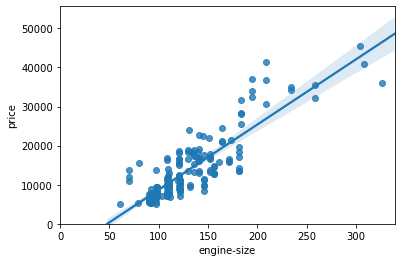

In [8]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.xlim(0,)

The above variables' correlation must be positive, as can be seen on the plot, and can be verified as below.

In [9]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<strong>Negative linear relationship</strong> between a potential predictor variable and the target variable.

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

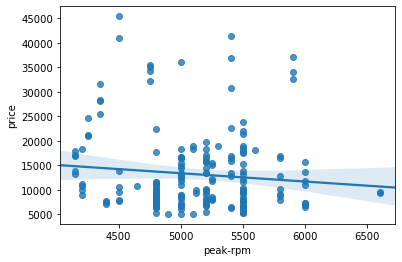

In [12]:
sns.regplot(x="peak-rpm", y="price", data=df)

The above variables' correlation must be negative, as can be seen on the plot, and can be verified as below.

In [14]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


It's not a good predictor as the correlation is weak (regression line is close to horizontal and data points are very scattered). Another example of <strong>weak correlation</strong> is given below.

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


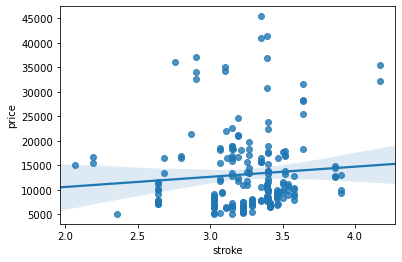

In [15]:
sns.regplot(x="stroke", y="price", data=df)
df[["stroke", "price"]].corr()